# TELL Analysis of July 2006 Heat Wave

This notebook processes and makes plots of the temporal evolution of load during the course of the July 2006 heat wave in the western U.S.

In [2]:
# Start by importing required packages and information about your operating system:
import os 
import datetime

import pandas as pd
import matplotlib.pyplot as plt

from glob import glob


## Set the Directory Structure

In [3]:
# Identify the top-level data input and output directories:
data_input_dir =  '/Users/burl878/Documents/Research/IMMM/Data/TELL/Production_Runs/tell_data/outputs/tell_output'
data_output_dir =  '/Users/burl878/Documents/code_repos/ntp_heat_wave/data'
image_output_dir =  '/Users/burl878/Documents/code_repos/ntp_heat_wave/plots'

# If the "data_output_dir" subdirectory doesn't exist then create it:
if not os.path.exists(data_output_dir):
   os.makedirs(data_output_dir)

# If the "image_output_dir" subdirectory doesn't exist then create it:
if not os.path.exists(image_output_dir):
   os.makedirs(image_output_dir)


## Process the TELL Time Series:

In [25]:
# Define function to process the load time series for a given year and scenario:
def process_tell_time_series(data_input_dir: str, data_output_dir: str, year_to_process: int, scenario_to_process: str):
    # Read in the tell state-level load time series:
    load_df = pd.read_csv(os.path.join((data_input_dir + '/' + scenario_to_process + '/' + str(year_to_process) + '/' + 'TELL_State_Hourly_Load_Data_' + str(year_to_process) + '_Scaled_' + str(year_to_process) + '.csv')))
    
    # Rename some columns:
    load_df.rename(columns={'State_Name': 'State', 'Scaled_TELL_State_Load_MWh': 'Load_MWh'}, inplace=True)
    
    # Only keep the columns that are needed:
    load_df = load_df[['State', 'Time_UTC', 'Load_MWh']].copy()
    
    # Subset to only states in the WECC:
    wecc_df = load_df.loc[load_df['State'].isin(['Washington', 'Oregon', 'California', 'Montana', 'Idaho', 'Nevada', 'Arizona', 'New Mexico', 'Colorado', 'Utah', 'Wyoming'])].copy()
        
    # Sum the load across states by time:
    wecc_load_df = wecc_df.groupby(['Time_UTC'])['Load_MWh'].sum().reset_index()

    # Rename some the load variable:
    wecc_load_df.rename(columns={'Load_MWh': 'WECC_Load_MWh'}, inplace=True)
    
    # Subset to only California:
    ca_df = load_df.loc[load_df['State'].isin(['California'])].copy()
    
    # Rename some the load variable:
    ca_df.rename(columns={'Load_MWh': 'CA_Load_MWh'}, inplace=True)
    
    # Merge the dataframes based on county FIPS code :
    output_df = pd.merge(wecc_load_df, ca_df, how='left', on=['Time_UTC'])
    
    # Only keep the columns that are needed:
    output_df = output_df[['Time_UTC', 'WECC_Load_MWh', 'CA_Load_MWh']].copy()
    
    # Set the output filename:
    csv_output_filename = os.path.join(data_output_dir + '/' + str(year_to_process) + '_Load_Time_Series_' + scenario_to_process + '.csv')

    # Write out the dataframe to a .csv file:
    output_df.to_csv(csv_output_filename, sep=',', index=False)
    
    return output_df


In [42]:
# Process the time series for that scenario:
output_df = process_tell_time_series(data_input_dir = data_input_dir,
                                     data_output_dir = data_output_dir,
                                     year_to_process = 2086, 
                                     scenario_to_process = 'rcp85hotter_ssp5')

output_df


,Time_UTC,WECC_Load_MWh,CA_Load_MWh
0,2086-01-01 00:00:00,195839.81,79245.71
1,2086-01-01 01:00:00,201614.88,81431.01
2,2086-01-01 02:00:00,204642.81,82652.50
3,2086-01-01 03:00:00,207873.87,84481.63
4,2086-01-01 04:00:00,209430.69,86392.84
...,...,...,...
8755,2086-12-31 19:00:00,203723.37,78040.73
8756,2086-12-31 20:00:00,202511.99,78162.00
8757,2086-12-31 21:00:00,201716.08,78425.74
8758,2086-12-31 22:00:00,201769.20,79220.79


In [66]:
# Define a function to plot time series of tell loads for the heat wave event:
def plot_load_time_series(start_day: int, end_day: int, ymin: int, ymax: int, data_input_dir: str, image_output_dir: str, image_resolution: int, save_images=False):
    
    # Read in the input files:
    df_2046_rcp45cooler_ssp3 = pd.read_csv((data_input_dir + '/' + '2046_Load_Time_Series_rcp45cooler_ssp3.csv'), parse_dates=['Time_UTC'])
    df_2046_rcp45cooler_ssp5 = pd.read_csv((data_input_dir + '/' + '2046_Load_Time_Series_rcp45cooler_ssp5.csv'), parse_dates=['Time_UTC'])
    df_2046_rcp45hotter_ssp3 = pd.read_csv((data_input_dir + '/' + '2046_Load_Time_Series_rcp45hotter_ssp3.csv'), parse_dates=['Time_UTC'])
    df_2046_rcp45hotter_ssp5 = pd.read_csv((data_input_dir + '/' + '2046_Load_Time_Series_rcp45hotter_ssp5.csv'), parse_dates=['Time_UTC'])
    df_2046_rcp85cooler_ssp3 = pd.read_csv((data_input_dir + '/' + '2046_Load_Time_Series_rcp85cooler_ssp3.csv'), parse_dates=['Time_UTC'])
    df_2046_rcp85cooler_ssp5 = pd.read_csv((data_input_dir + '/' + '2046_Load_Time_Series_rcp85cooler_ssp5.csv'), parse_dates=['Time_UTC'])
    df_2046_rcp85hotter_ssp3 = pd.read_csv((data_input_dir + '/' + '2046_Load_Time_Series_rcp85hotter_ssp3.csv'), parse_dates=['Time_UTC'])
    df_2046_rcp85hotter_ssp5 = pd.read_csv((data_input_dir + '/' + '2046_Load_Time_Series_rcp85hotter_ssp5.csv'), parse_dates=['Time_UTC'])
    
    df_2086_rcp45cooler_ssp3 = pd.read_csv((data_input_dir + '/' + '2086_Load_Time_Series_rcp45cooler_ssp3.csv'), parse_dates=['Time_UTC'])
    df_2086_rcp45cooler_ssp5 = pd.read_csv((data_input_dir + '/' + '2086_Load_Time_Series_rcp45cooler_ssp5.csv'), parse_dates=['Time_UTC'])
    df_2086_rcp45hotter_ssp3 = pd.read_csv((data_input_dir + '/' + '2086_Load_Time_Series_rcp45hotter_ssp3.csv'), parse_dates=['Time_UTC'])
    df_2086_rcp45hotter_ssp5 = pd.read_csv((data_input_dir + '/' + '2086_Load_Time_Series_rcp45hotter_ssp5.csv'), parse_dates=['Time_UTC'])
    df_2086_rcp85cooler_ssp3 = pd.read_csv((data_input_dir + '/' + '2086_Load_Time_Series_rcp85cooler_ssp3.csv'), parse_dates=['Time_UTC'])
    df_2086_rcp85cooler_ssp5 = pd.read_csv((data_input_dir + '/' + '2086_Load_Time_Series_rcp85cooler_ssp5.csv'), parse_dates=['Time_UTC'])
    df_2086_rcp85hotter_ssp3 = pd.read_csv((data_input_dir + '/' + '2086_Load_Time_Series_rcp85hotter_ssp3.csv'), parse_dates=['Time_UTC'])
    df_2086_rcp85hotter_ssp5 = pd.read_csv((data_input_dir + '/' + '2086_Load_Time_Series_rcp85hotter_ssp5.csv'), parse_dates=['Time_UTC'])
    
    # Make the plot:
    plt.figure(figsize=(25, 10))
        
    plt.subplot(3,3,1)
    plt.xlim([datetime.date(2006, 7, start_day), datetime.date(2006, 7, end_day)])
    #plt.ylim([ymin, ymax])
    plt.xticks([])
    plt.xlabel('')
    plt.ylabel('Total Load [MWh]')
    plt.title('Total Load in the WECC: 2006')
    
    plt.subplot(3,3,2)
    plt.plot(df_2046_rcp45cooler_ssp5['Time_UTC'], df_2046_rcp45cooler_ssp5['WECC_Load_MWh'], color='b', linestyle='-', label='rcp45cooler', linewidth=1)
    plt.plot(df_2046_rcp45hotter_ssp5['Time_UTC'], df_2046_rcp45hotter_ssp5['WECC_Load_MWh'], color='g', linestyle='-', label='rcp45hotter', linewidth=1)
    plt.plot(df_2046_rcp85cooler_ssp5['Time_UTC'], df_2046_rcp85cooler_ssp5['WECC_Load_MWh'], color='orange', linestyle='-', label='rcp85cooler', linewidth=1)
    plt.plot(df_2046_rcp85hotter_ssp5['Time_UTC'], df_2046_rcp85hotter_ssp5['WECC_Load_MWh'], color='r', linestyle='-', label='rcp85hotter', linewidth=1)
    plt.xlim([datetime.date(2046, 7, start_day), datetime.date(2046, 7, end_day)])
    #plt.ylim([ymin, ymax])
    plt.xticks([])
    plt.legend(loc='lower left', mode='expand', ncol=4)
    plt.xlabel('')
    plt.ylabel('Total Load [MWh]')
    plt.title('Total Load in the WECC: 2046')
    
    plt.subplot(3,3,3)
    plt.plot(df_2086_rcp45cooler_ssp5['Time_UTC'], df_2086_rcp45cooler_ssp5['WECC_Load_MWh'], color='b', linestyle='-', label='rcp45cooler', linewidth=1)
    plt.plot(df_2086_rcp45hotter_ssp5['Time_UTC'], df_2086_rcp45hotter_ssp5['WECC_Load_MWh'], color='g', linestyle='-', label='rcp45hotter', linewidth=1)
    plt.plot(df_2086_rcp85cooler_ssp5['Time_UTC'], df_2086_rcp85cooler_ssp5['WECC_Load_MWh'], color='orange', linestyle='-', label='rcp85cooler', linewidth=1)
    plt.plot(df_2086_rcp85hotter_ssp5['Time_UTC'], df_2086_rcp85hotter_ssp5['WECC_Load_MWh'], color='r', linestyle='-', label='rcp85hotter', linewidth=1)
    plt.xlim([datetime.date(2086, 7, start_day), datetime.date(2086, 7, end_day)])
    #plt.ylim([ymin, ymax])
    plt.xticks([])
    plt.legend(loc='lower left', mode='expand', ncol=4)
    plt.xlabel('')
    plt.ylabel('Total Load [MWh]')
    plt.title('Total Load in the WECC: 2086')
    
    plt.subplot(3,3,4)
    plt.xlim([datetime.date(2006, 7, start_day), datetime.date(2006, 7, end_day)])
    #plt.ylim([ymin, ymax])
    plt.xticks([])
    plt.xlabel('')
    plt.ylabel('Total Load [MWh]')
    plt.title('Total Load in California: 2006')
    
    plt.subplot(3,3,5)
    plt.plot(df_2046_rcp45cooler_ssp5['Time_UTC'], df_2046_rcp45cooler_ssp5['CA_Load_MWh'], color='b', linestyle='-', label='rcp45cooler', linewidth=1)
    plt.plot(df_2046_rcp45hotter_ssp5['Time_UTC'], df_2046_rcp45hotter_ssp5['CA_Load_MWh'], color='g', linestyle='-', label='rcp45hotter', linewidth=1)
    plt.plot(df_2046_rcp85cooler_ssp5['Time_UTC'], df_2046_rcp85cooler_ssp5['CA_Load_MWh'], color='orange', linestyle='-', label='rcp85cooler', linewidth=1)
    plt.plot(df_2046_rcp85hotter_ssp5['Time_UTC'], df_2046_rcp85hotter_ssp5['CA_Load_MWh'], color='r', linestyle='-', label='rcp85hotter', linewidth=1)
    plt.xlim([datetime.date(2046, 7, start_day), datetime.date(2046, 7, end_day)])
    #plt.ylim([ymin, ymax])
    plt.xticks([])
    plt.legend(loc='lower left', mode='expand', ncol=4)
    plt.xlabel('')
    plt.ylabel('Total Load [MWh]')
    plt.title('Total Load in California: 2046')
    
    plt.subplot(3,3,6)
    plt.plot(df_2086_rcp45cooler_ssp5['Time_UTC'], df_2086_rcp45cooler_ssp5['CA_Load_MWh'], color='b', linestyle='-', label='rcp45cooler', linewidth=1)
    plt.plot(df_2086_rcp45hotter_ssp5['Time_UTC'], df_2086_rcp45hotter_ssp5['CA_Load_MWh'], color='g', linestyle='-', label='rcp45hotter', linewidth=1)
    plt.plot(df_2086_rcp85cooler_ssp5['Time_UTC'], df_2086_rcp85cooler_ssp5['CA_Load_MWh'], color='orange', linestyle='-', label='rcp85cooler', linewidth=1)
    plt.plot(df_2086_rcp85hotter_ssp5['Time_UTC'], df_2086_rcp85hotter_ssp5['CA_Load_MWh'], color='r', linestyle='-', label='rcp85hotter', linewidth=1)
    plt.xlim([datetime.date(2086, 7, start_day), datetime.date(2086, 7, end_day)])
    #plt.ylim([ymin, ymax])
    plt.xticks([])
    plt.legend(loc='lower left', mode='expand', ncol=4)
    plt.xlabel('')
    plt.ylabel('Total Load [MWh]')
    plt.title('Total Load in the California: 2086')
    
    plt.subplot(3,3,7)
    plt.xlim([datetime.date(2006, 7, start_day), datetime.date(2006, 7, end_day)])
    #plt.ylim([ymin, ymax])
    plt.xticks([])
    plt.xlabel('Time [UTC]')
    plt.ylabel('Total Load [MWh]')
    plt.title('Total Load in Los Angeles County: 2006')
    
    plt.subplot(3,3,8)
    plt.xlim([datetime.date(2006, 7, start_day), datetime.date(2006, 7, end_day)])
    #plt.ylim([ymin, ymax])
    plt.xticks([])
    plt.xlabel('Time [UTC]')
    plt.ylabel('Total Load [MWh]')
    plt.title('Total Load in Los Angeles County: 2046')
    
    plt.subplot(3,3,9)
    plt.xlim([datetime.date(2006, 7, start_day), datetime.date(2006, 7, end_day)])
    #plt.ylim([ymin, ymax])
    plt.xticks([])
    plt.xlabel('Time [UTC]')
    plt.ylabel('Total Load [MWh]')
    plt.title('Total Load in Los Angeles County: 2086')
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       filename = ('Heat_Wave_Load_Time_Series.png')
       plt.savefig(os.path.join(image_output_dir, filename), dpi=image_resolution, bbox_inches='tight', facecolor='white')


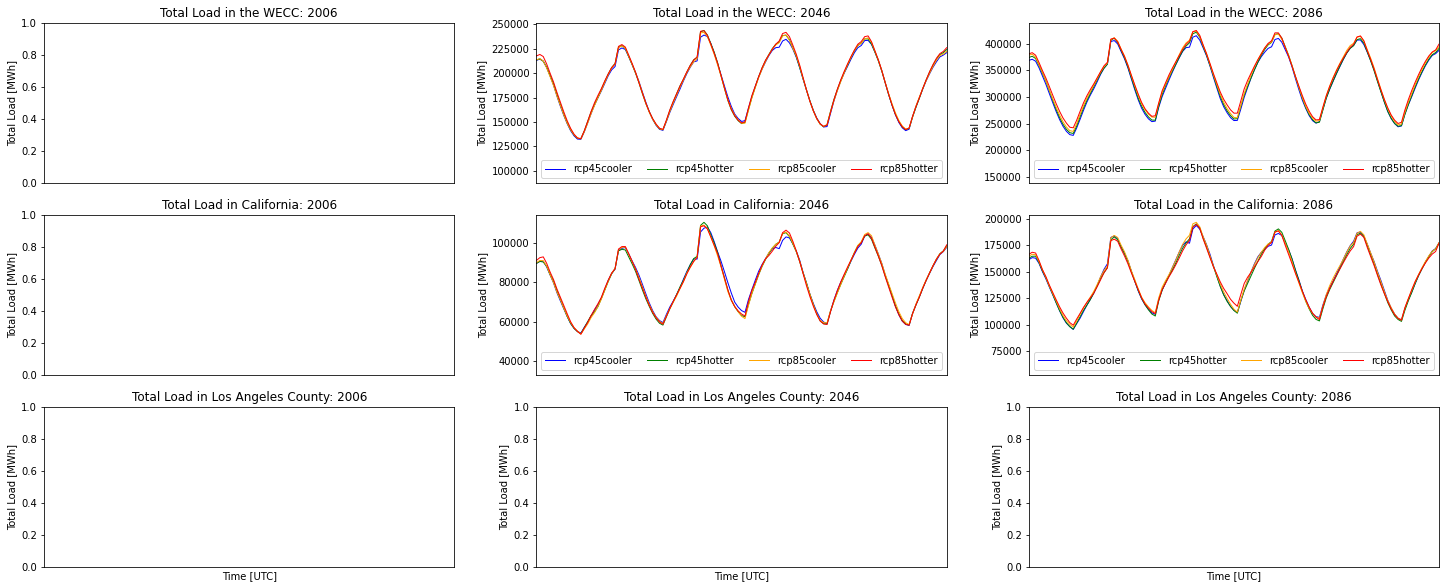

In [68]:
plot_load_time_series(start_day = 21,
                             end_day = 26,
                             ymin = 70, 
                             ymax = 111, 
                             data_input_dir = data_output_dir,
                             image_output_dir = image_output_dir, 
                             image_resolution = 125, 
                             save_images = True)
